## Analyze MovieLens Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [11]:
# File paths
data_file = '../data/raw/u.data'
user_file = '../data/raw/u.user'
item_file = '../data/raw/u.item'
genre_file = '../data/raw/u.genre'
occupation_file = '../data/raw/u.occupation'
info_file = '../data/raw/u.info'


In [12]:
# Ratings Data
ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(data_file, sep='\t', names=ratings_columns, encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
# User Data
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(user_file, sep='|', names=user_columns, encoding='latin-1')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [15]:
# Movie Data
item_columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
                'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                'Thriller', 'War', 'Western']
movies = pd.read_csv(item_file, sep='|', names=item_columns, encoding='latin-1')
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Genre Data
genre_columns = ['genre', 'genre_id']
genres = pd.read_csv(genre_file, sep='|', names=genre_columns, encoding='latin-1')
genres.head()

,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [17]:
# Occupation Data
occupations = pd.read_csv(occupation_file, names=['occupation'], encoding='latin-1')
occupations.head()

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


### Data Analysis

In [18]:
# Setting up the visualizations
sns.set(style="whitegrid")

##### Ratings Data

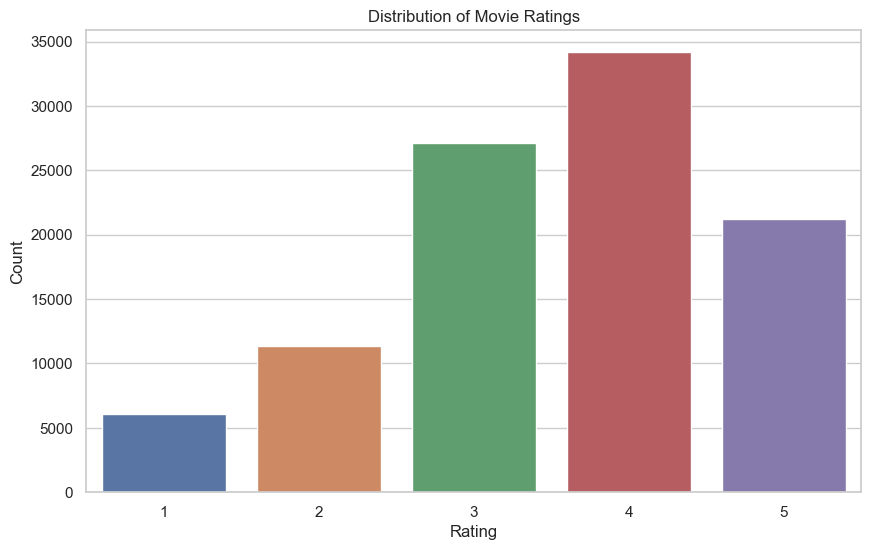

In [19]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Most ratings fall between 3 and 4. This suggests a generally positive rating trend among users.

__Implication for Preprocessing__: The model should be sensitive to this rating distribution. When splitting the data for training and testing, it's important to maintain a similar distribution in both sets.

##### User Demographics Analysis

<Figure size 1000x600 with 0 Axes>

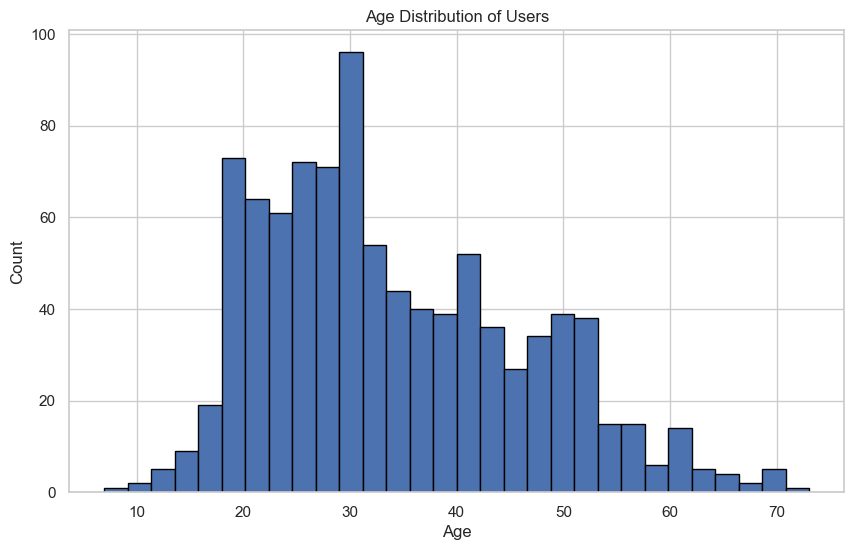

In [20]:
# Age Distribution
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.hist(users['age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

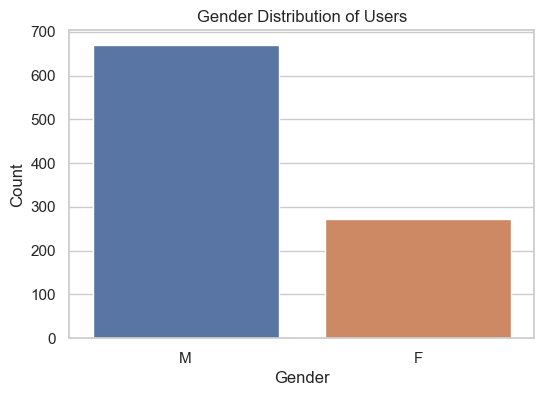

In [21]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=users)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

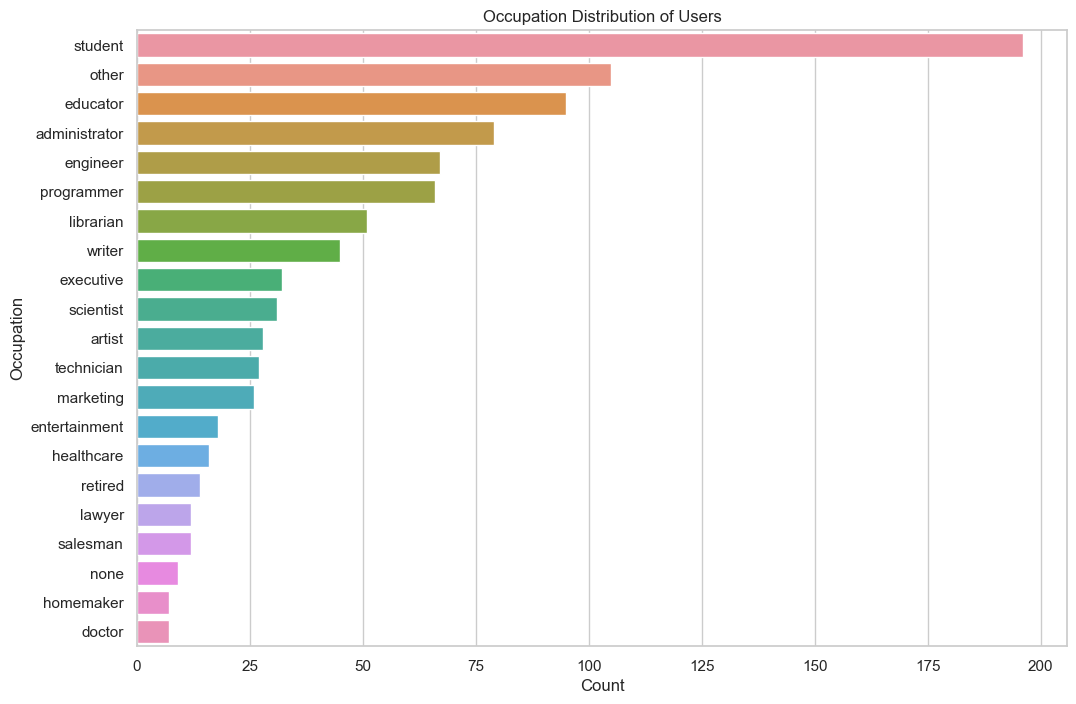

In [22]:
# Occupation Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='occupation', data=users, order = users['occupation'].value_counts().index)
plt.title('Occupation Distribution of Users')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

__Age Distribution__: The user base is skewed towards younger age groups, especially those in their 20s and 30s.

__Gender Distribution__: There are more male users than female users.

__Occupation Distribution__: Users come from a variety of occupations, with students, educators, and others being more prominent.

__Implication for Preprocessing__: Demographic features (age, gender, occupation) could be important in understanding user preferences. Age might need to be binned into categories for more effective use in models. Gender and occupation can be encoded (e.g., one-hot encoding) to be used as features.

##### Movie Genres Analysis

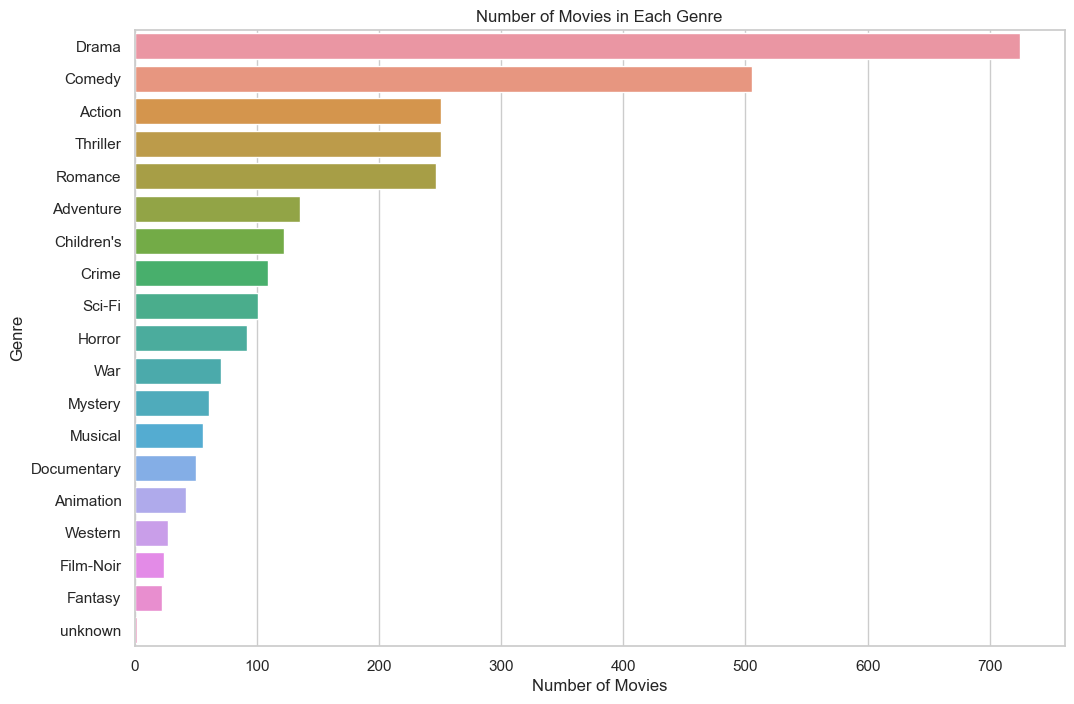

In [23]:
# Counting the number of movies in each genre
genre_counts = movies.iloc[:, 5:].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Number of Movies in Each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

Certain genres (e.g., Drama, Comedy) are more prevalent than others.

__Implication for Preprocessing__: Since genre is an important feature in determining user preferences, one-hot encoding of genres can be used to convert these categorical variables into a form that can be fed into machine learning models.

Insights from EDA
Distribution of Movie Ratings:


User Demographics Analysis:


Movie Genres Analysis:


Handling Missing Values: If any missing values are present in user demographics or movie details, they need to be handled, either by imputation or removal.

Feature Engineering:

User Features: Age might be categorized into groups (e.g., 18-25, 26-35, etc.). Gender and occupation should be one-hot encoded.
Movie Features: One-hot encoding of movie genres to create binary features for each genre.
    Timestamp: The timestamp in the ratings data might be converted into a more usable format, like extracting the year or month, if temporal trends are to be analyzed.
Normalization/Standardization: Depending on the model used, user age and other continuous features might need to be normalized or standardized.

Data Splitting: Ensure that the training and testing sets have similar distributions of ratings, user demographics, and movie genres. This can be done using stratified sampling techniques.

Handling Sparse Data: The user-item interaction matrix (ratings) is typically sparse. Techniques like matrix factorization can be used to handle this sparsity effectively in collaborative filtering models.